# Clustering Code Supplement

Credits to [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) for visualizations.

## Part 1. 

As always, let's import a bunch of libraries to get started. Here I'm relying on sklearn (sci-kit learn) for a lot of things, because it provides nice models and simple dataset generators. 

In [1]:
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

## k-Means Clustering Algorithm

First, let's make some blobs to cluster and plot it using a scatter plot: 

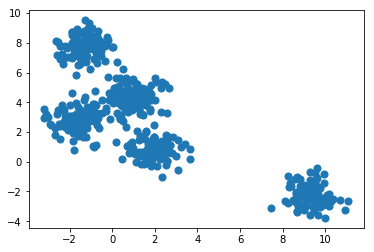

In [2]:
X, y_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=0.70, random_state=0)  # Create the dataset, with labels stored in y_true 
plt.scatter(X[:, 0], X[:, 1], s=50);    # The parameter s defines the size of the points on the scatter plot 

The thing with k-means is that you have to tell it how many clusters to use beforehand! Now let's use a built-in Python function to fit a model and get some predictions. 

In [3]:
kmeans = KMeans(n_clusters=5)   # Create an instance of the k-means model (i.e. we're telling Python which model to use)
kmeans.fit(X)                   # Fit the model (i.e. train the k-means model on the data)
y_pred = kmeans.predict(X)      # Use the model to make predictions

To plot it, use a scatter plot, and color the points according to their predicted cluster values. Also, plot the centroids.

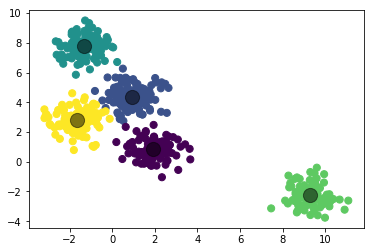

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Evaluating K-Means

You can use either homogeneity or completeness scores. Homogeneity is measuring that every cluster only contains the one class. Completeness is measuring that everything in a given class is in the same cluster. What's the difference? Read [here](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure) for more.

Note: we're sparing you the formulas for homogeneity and completeness because they're pretty complicated. Both formulas come from the following white paper:
http://aclweb.org/anthology/D/D07/D07-1043.pdf

### Homogeneity
Homogeneity means all of the observations with the same class label are in the same cluster.

In [5]:
print(homogeneity_score(y_true, y_pred))

0.976136018796


#### Mini-Exercise

Interpret the homogeneity score in words. What does this imply about our clustering algorithm?

### Completeness Score

Completeness means all members of the same class are in the same cluster.

In [6]:
print(completeness_score(y_true, y_pred))

0.976293041881


#### Mini-Exercise

Interpret the completeness score in words. What does this imply about our clustering algorithm?

## Exercises


1) Brainstorm when we would prioritize the homogeneity score vs. the completeness score, and vice versa.

2) Change the number of clusters to less than or more than 5. What does this do to the scores and to the visualizations? Is it generally better to have more or less clusters?

## Part 2.  

Now, let's try to implement the k-means algorithm for ourselves. We'll step you through it a little bit. 

To start off, we're going to generate a new dataset to play with. 

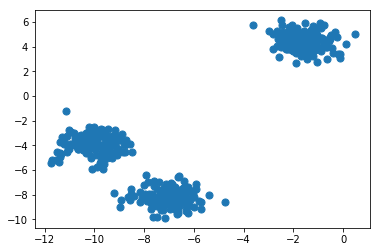

In [7]:
k = 3    # This is the number of clusters we're working with
X, y_true = make_blobs(n_samples=500, centers=k,
                       cluster_std=0.70, random_state=1)  # Create the dataset, with labels stored in y_true 
plt.scatter(X[:, 0], X[:, 1], s=50);    # The parameter s defines the size of the points on the scatter plot 

Recall the k-means algorithm steps:

1. Choose the value of k  (This is how many cluster centroids we’re finding)
2. Choose k points in the set (These are the initial centroid locations)
3. For each point not selected, assign to its nearest centroid (Now all points have an initial cluster assignment)
4. Until “happy” do:
    - Recompute centroids of clusters 
    - Reassign all points to closest centroid (forms new clusters) 
    
So, we've got to figure all of these steps out. 


Step 1. What is k? Notice that we've already defined it above. 

Step 2. Initializing the centroids. Choose k random points in the dataset. The centroids will begin at these points.

In [9]:
import random

# This is how you choose random integers using len(X), which is the number of data examples that we have.

print(len(X))
random_i = random.randint(0, len(X))
print(random_i)

# How can you use this to pick out individual rows of X?
# Hint: print(X[random_i])

# Now figure out how to do this k times, and store them: 
centroids = []
# centroids = TODO 





print(centroids[0])
print(centroids[1])
print(centroids[2])


Step 3. We're giving you a function which computes the distance between any two points in X.

In [ ]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

error = dist(X[0], X[1], None)
print(error)

Create an array to store the predicted labels for each point in X. 

In [ ]:
y_pred = np.zeros(len(X))

Now, we want to make a function that checks one point and finds the closest centroid to it. The function should return the label of the closest centroid. 

In [ ]:

def find_closest_centroid(point, centroids): # takes in the point and the list of centroid locations
    error = dist(point, centroids[0], None)
    label = 0
    for i in range(1,len(centroids)):
        # if(TODO)
            # TODO: reassign predicted label if this centroid is closer (smaller distance)
            

    return label


print(find_closest_centroid(X[0], centroids))

Finally, let's use that function that we made, find_closest_centroid(), to assign clusters to every point in X.

In [ ]:
for i in range(len(X)):
    # y_pred[i] = TODO


Step 4. Awesome! Now we have our initial cluster locations, and every point has an initial predicted value. 

It's time to start running through the iterations. 

In [ ]:
import copy

while error > 0.01:
           
    # Storing the old centroid values
    centroids_old = copy.deepcopy(centroids)
    
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if y_pred[j] == i]
        centroids[i] = np.mean(points, axis=0)
        
    # Re-assign each point to its new closest cluster
    for i in range(len(X)):
        # y_pred[i] = TODO 
        
    # Updating the distance between the new and old centroid locations 
    error = dist(np.asmatrix(centroids), np.asmatrix(centroids_old), None)
    
print(error)

Now, plot the result: 

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
c = np.asmatrix(centroids[:])
plt.scatter([c[:,0]], [c[:,1]], c='black', s=200, alpha=0.5);

Print your homogenity and completeness scores. What does this tell us?

## Challenge section!

The following piece of code shows you how to import the "digits" dataset from sklearn. 

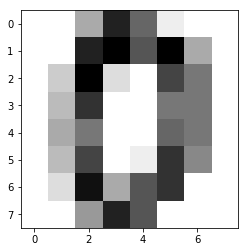

(1797, 64)
(1797,)


In [12]:
import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y_true = digits.target

#Display an example digit
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.show()

print(digits.data.shape)
print(digits.target.shape)

Challenge: Run the k-means algorithm on the digits dataset. You won't be able to plot the data nicely to visualize the clusters (why?). How else can you decide how well the algorithm performed? Where does your algorithm make mistakes?